##### Linear regression 
1. linear regression 개요 
* 독립 변수 x를 사용하여 종속 변수 y의 움직임을 예측하고 설명하는데 사용된다. 
* x값 하나로 y값을 설명할 수 있다면 simple linear regresssion 
* x값이 여러 개라면 Multiple linear regression 
* 독립변수가 변경되었을 때 종속 변수를 추정하는데 유용하다. 

In [11]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import os 
import sklearn 
import seaborn as seabornInstance
from sklearn.linear_model import LinearRegression

In [28]:
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.preprocessing import StandardScaler
from google.colab import drive 

In [3]:
drive.mount("/content/drive/") 

Mounted at /content/drive/


In [4]:
FILE_PATH = "/content/drive/MyDrive/dataset/p ytorch/weather.csv"

In [5]:
dataset = pd.read_csv(FILE_PATH)

In [6]:
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,11/1/2007,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,11/2/2007,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,11/3/2007,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,11/4/2007,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,11/5/2007,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


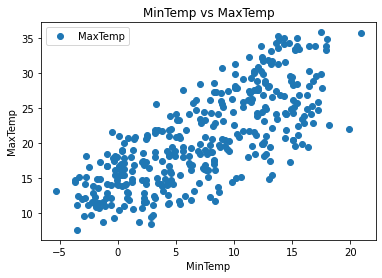

In [7]:
dataset.plot(x="MinTemp", y="MaxTemp", style="o")
plt.title("MinTemp vs MaxTemp")
plt.xlabel("MinTemp")
plt.ylabel("MaxTemp")
plt.show()

In [9]:
x = dataset["MinTemp"].values.reshape(-1, 1)
y = dataset["MaxTemp"].values.reshape(-1, 1)


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2022)
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [15]:
y_prediction  = regressor.predict(x_test)
df = pd.DataFrame({"Actual":y_test.flatten(), "Predicted":y_prediction.flatten()})

In [16]:
df.head()

,Actual,Predicted
0,19.6,27.086530
1,18.7,17.260027
2,9.7,17.097606
3,11.6,13.605543
4,14.2,14.580072


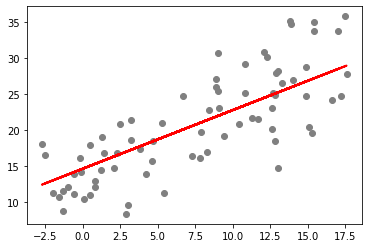

In [17]:
plt.scatter(x_test, y_test, color="gray")
plt.plot(x_test, y_prediction, color="red", linewidth=2)
plt.show()

In [30]:
print("MSE :", metrics.mean_squared_error(y_test, y_prediction))
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))


MSE : 19.747553700954754
RMSE : 4.443821969988757
